# Predicting Customer Churn - Data Exploration and Visualization

### Background

**Objective:** From the dataset on Telco customer we predict customer churn i.e if the customer will leave the service.

### Data Description:

The raw data contains 7043 rows (customers data) and 21 columns (features).

**Field Descriptions**
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

#### This notebook focus on the Data Exploration and Visualizations

## Exploratory Data Analysis and Visualizations

RR - crosstab data, chrun percentage, pie plot, violin plot, correlation, missing data, encoding, standard scalar, model, feature importance.
EA - Missing value, churn values (imbalanced dataset), numerical/categorical, eda - categorical, correlation, feature importance (random forest), feature scaling, crossvalidation,  metrics - accuracy, roc curve, model - LR, SVM, KNN, 
TC - EDA categorical, modeling,  
TC - missing values, change to float, 

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import scipy.stats as stats
from scipy import stats
from scipy.stats import pointbiserialr, spearmanr, skew, pearsonr
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', None)

In [2]:
# import the dataset
data = pd.read_csv('./Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#### Basic Data Information

In [3]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Shape of data
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Numerical variables
num_var = ['tenure', 'MonthlyCharges','TotalCharges' ]

In [8]:
# Categorical variable
cat_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

In [9]:
# Values of categorical variables
for i in cat_var:
    print(i, data[i].unique())
    

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [10]:
data[num_var].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [11]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges column is numerical but given as float. However we cannot directly convert to float since some values contain blank (" "). 

In [12]:
data[data['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Note that the ones with blank values in TotalCharges have Tenure = 0. So most probably they have not paid any bill. So we impute them with zero and set as float.

In [13]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype('float32')

In [14]:
# Change senior citizen as category 
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

In [15]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.732178
std,24.559481,30.090047,2266.794434
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.549988
50%,29.000000,70.350000,1394.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


In [16]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


#### Crosstab

In [17]:
pd.crosstab(index = data.gender, columns = data.Churn)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [18]:
summary = pd.concat([pd.crosstab(data[x], data.Churn) for x in cat_var], keys=cat_var)
summary['Churn_Percentage'] = summary['Yes'] / (summary['No'] + summary['Yes'])
summary    

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067
Churn            No                         5174     0          0.000000
                 Yes                           0  1869          1.000000

**Customers with distinct more churn percentage:** Senior citizen, No partner, No dependant, fibreoptic internet, no online security/backup, no device protection, month-to-month contract, paperless billing, electronic check.

## Exploratory Data Visualizations

### Univariate analysis

#### Histogram

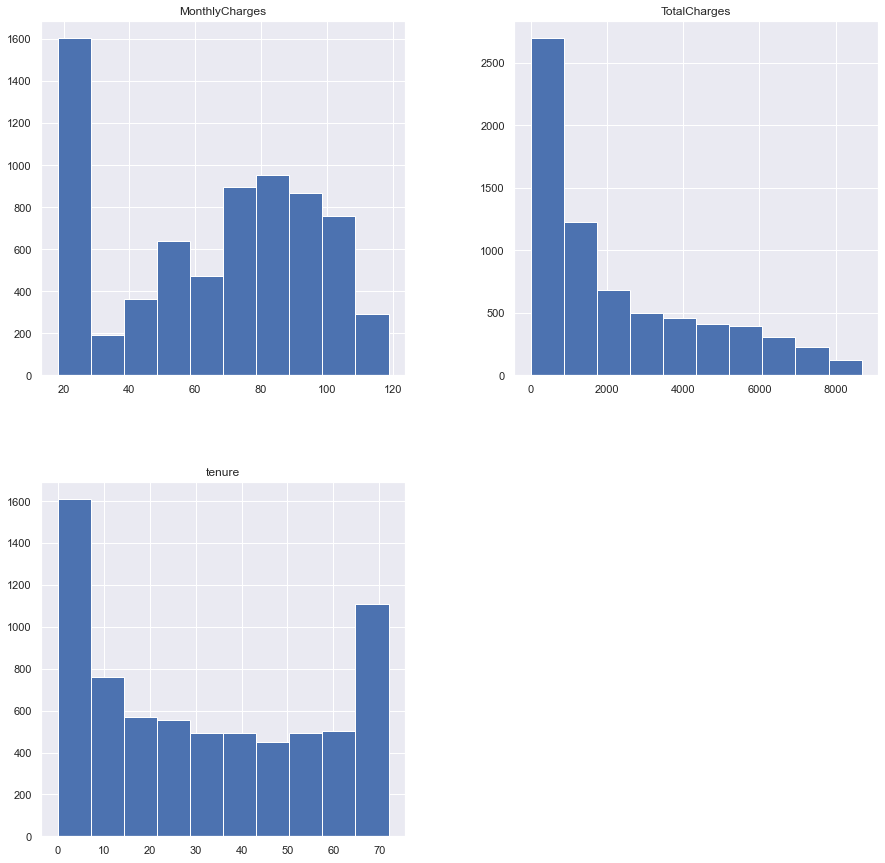

In [19]:
sns.set()
data.hist(figsize=(15,15));

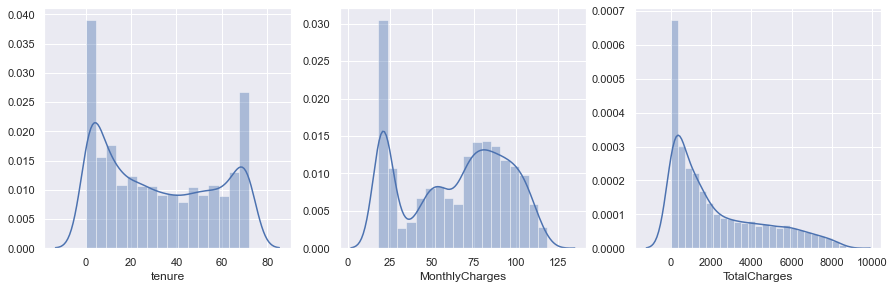

In [20]:
plt.subplots(figsize=(15, 15))
plt.tight_layout
for k,i in enumerate(num_var):
    plt.subplot(3,3,k+1)
    sns.distplot(data[i])

#### Boxplot & Violinplot

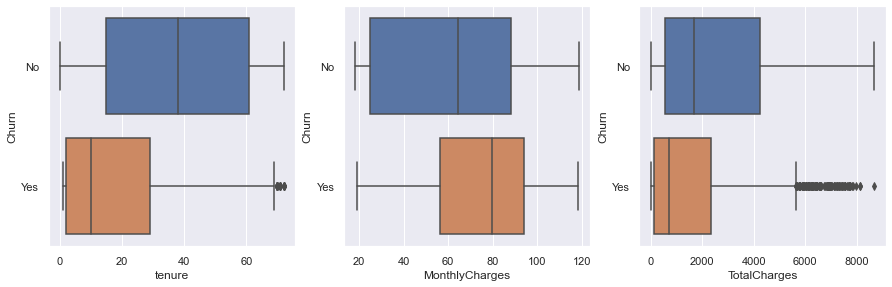

In [21]:
plt.subplots(figsize=(15, 15))
plt.tight_layout
for k,i in enumerate(num_var):
    plt.subplot(3,3,k+1)
    sns.boxplot(x = i, y = "Churn", data = data)

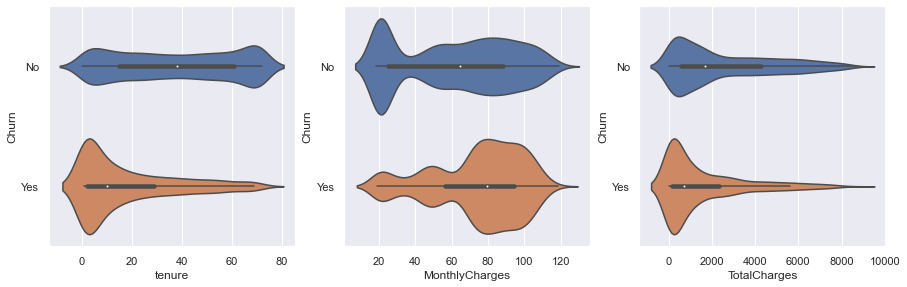

In [22]:
plt.subplots(figsize=(15, 15))
plt.tight_layout
for k,i in enumerate(num_var):
    plt.subplot(3,3,k+1)
    sns.violinplot(x = i, y = "Churn", data = data)

1) Churn occurs early in tenure. For longer tenure, churn occurs less frequently. <br>
2) Churn occurs much more for customer with higher montly charges

### Bivariate analysis

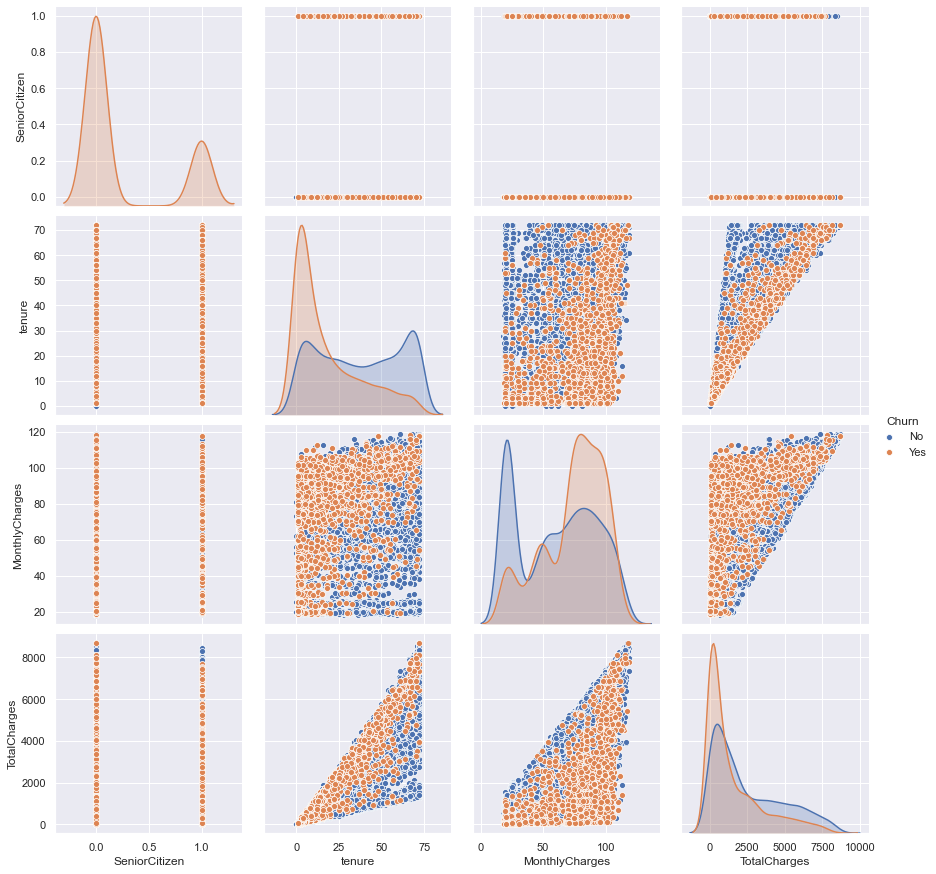

In [23]:
sns.pairplot(data, hue = 'Churn', height=3);

Large tenure corresponds to lower monthly charges with no churn. 

### Categorical Variables

#### Countplot 

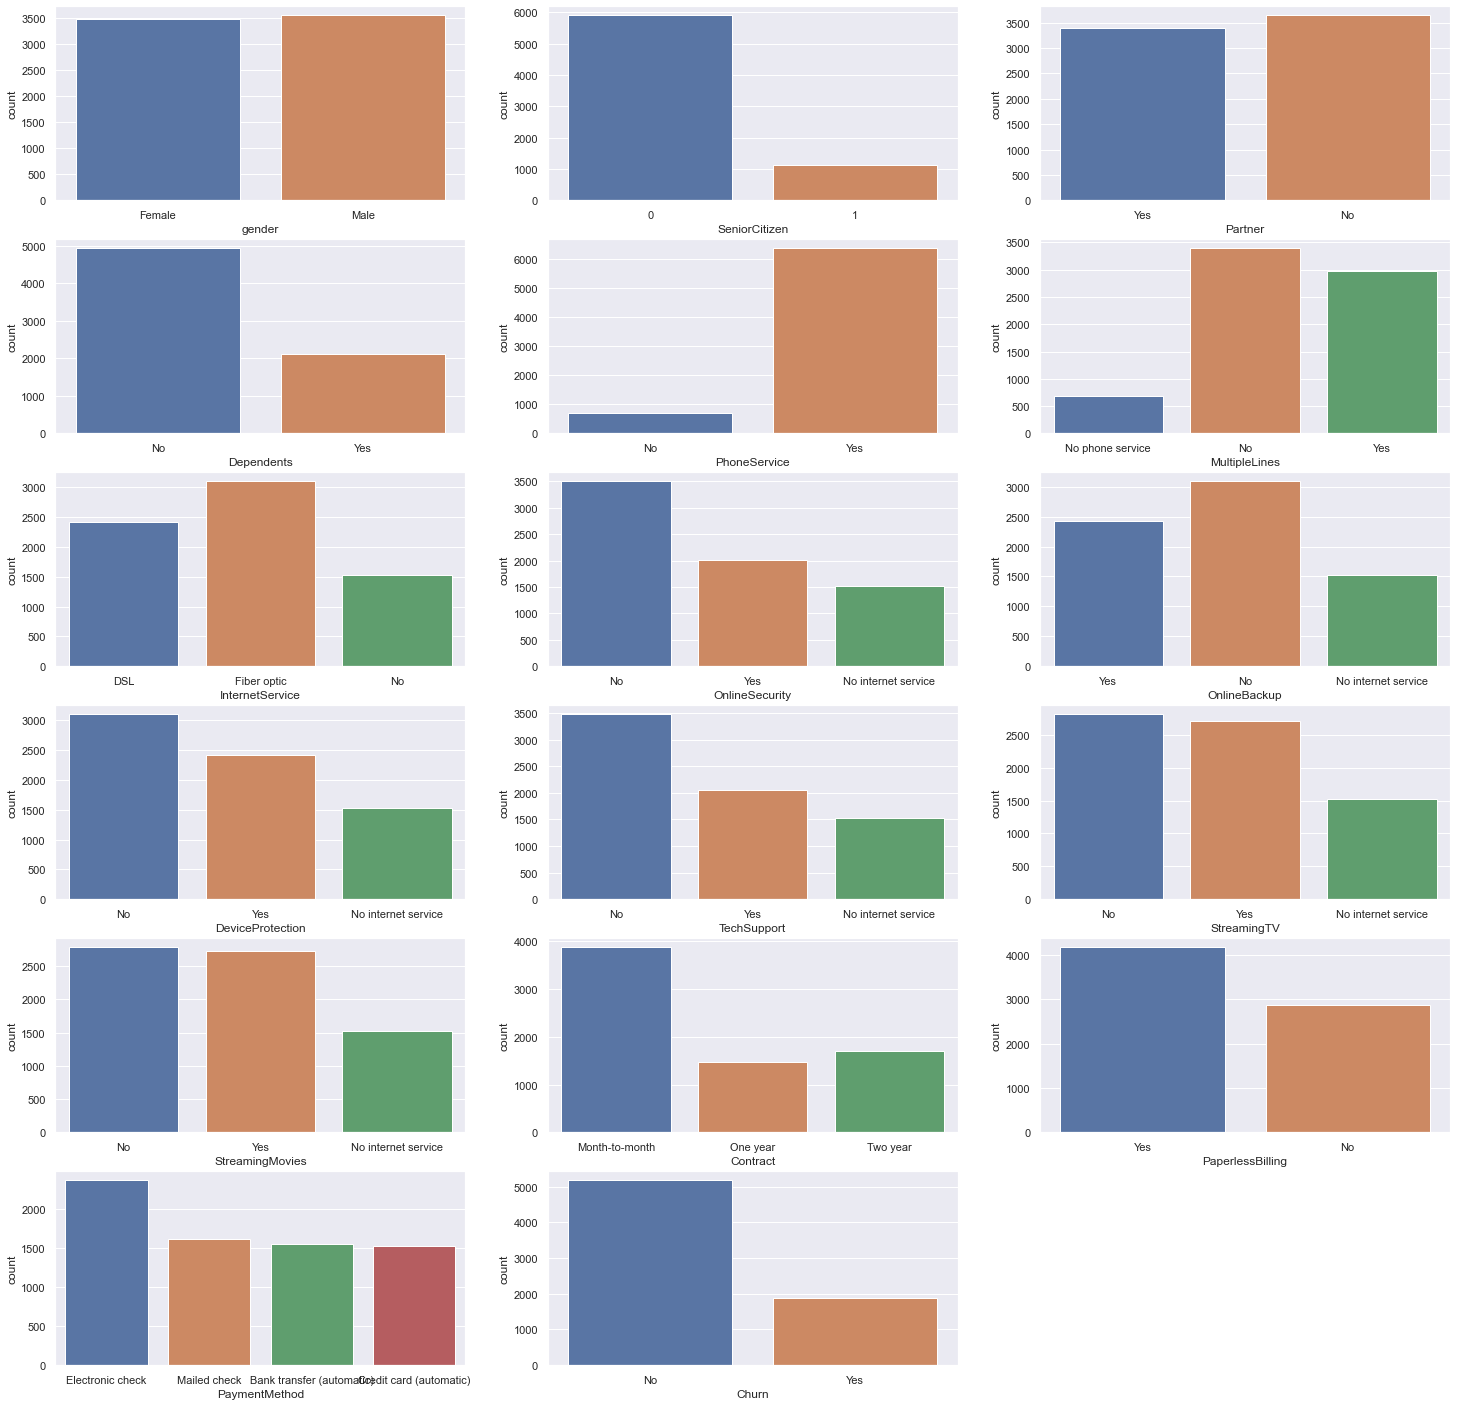

In [24]:
plt.subplots(figsize=(25, 25))
plt.tight_layout
for k,i in enumerate(cat_var):
    plt.subplot(6,3,k+1)
    sns.countplot(x = i,  data = data)

#### Barplot comparing churn

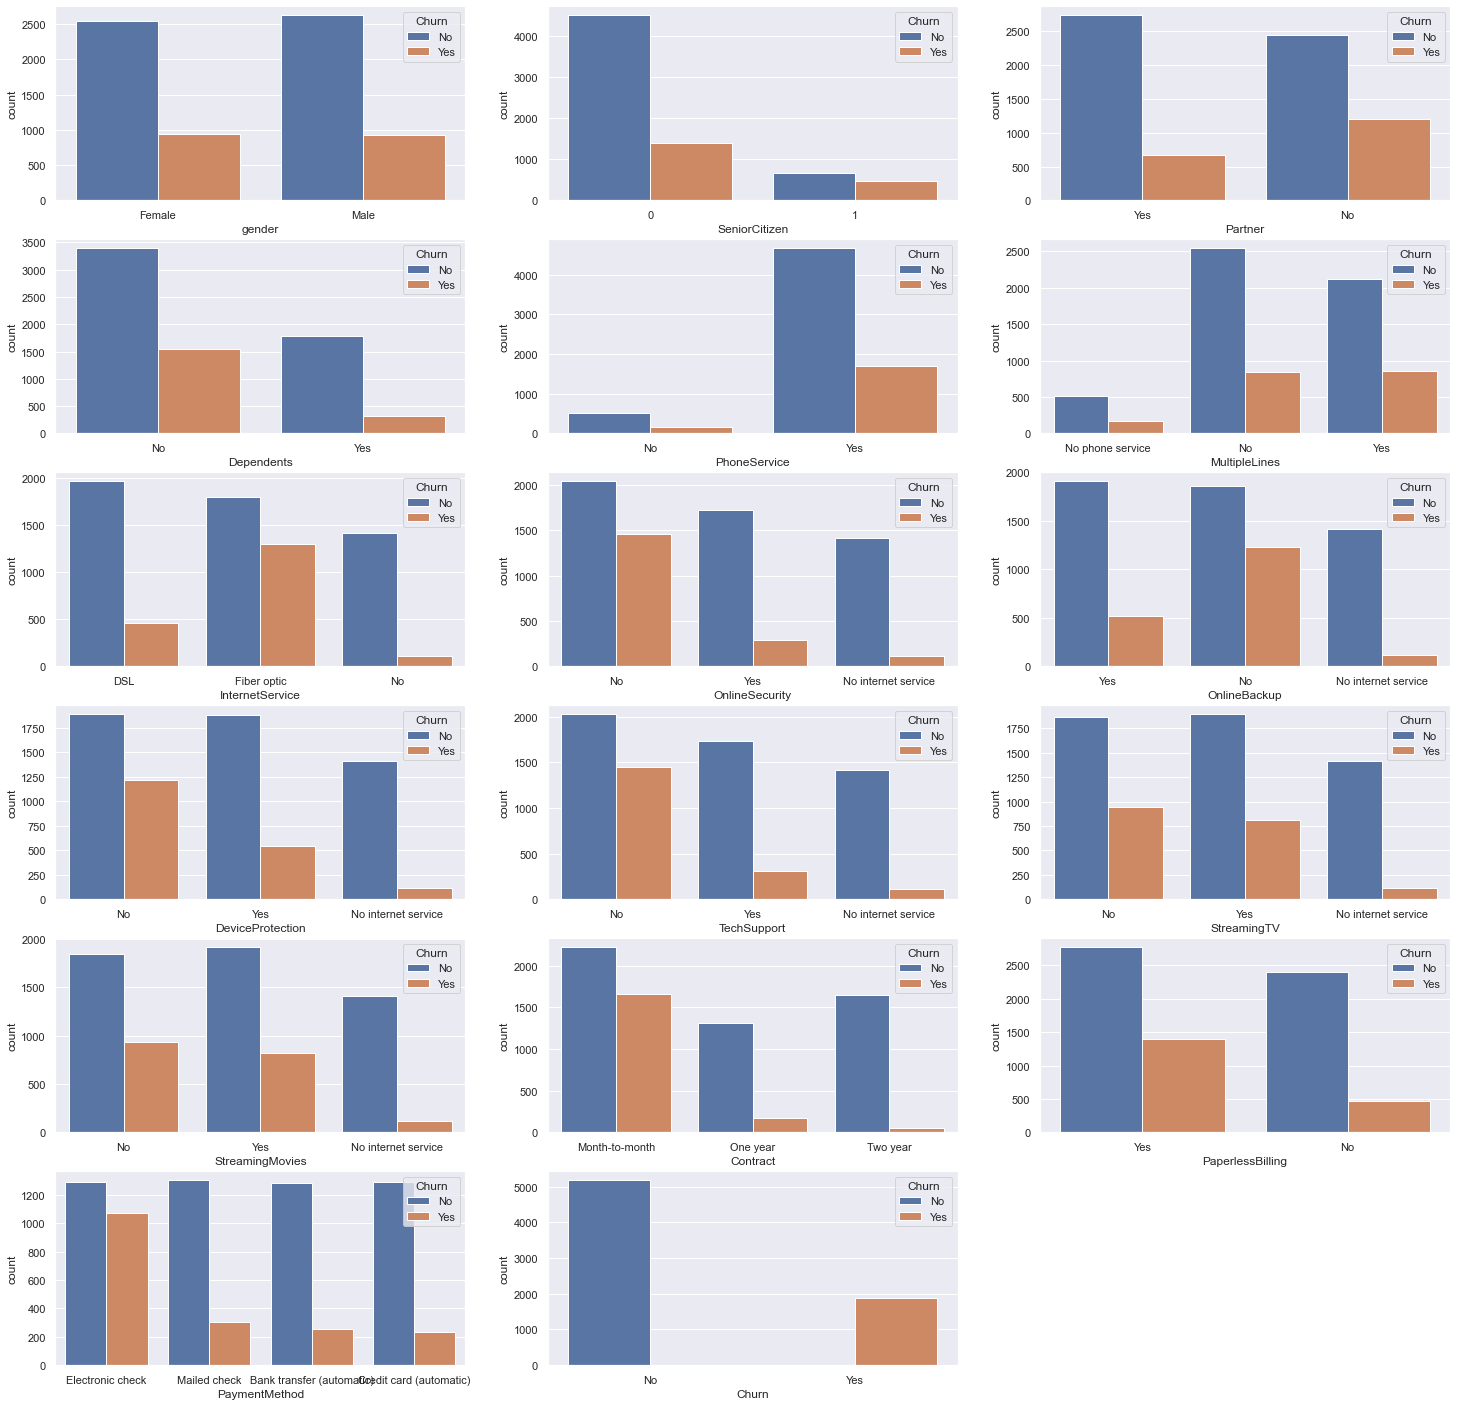

In [25]:
plt.subplots(figsize=(25, 25))
plt.tight_layout
for k,i in enumerate(cat_var):
    plt.subplot(6,3,k+1)
    sns.countplot(x = i, hue = 'Churn', data = data)

**Observations:** 

### Correlations

Correlations between numerical features

In [26]:
corr_num = data.corr()

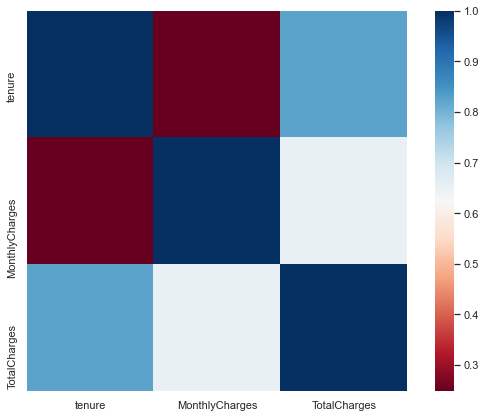

In [27]:
plt.subplots(figsize=(10, 7))
sns.heatmap(corr_num, vmax=1, cmap="RdBu", square=True);

The pearson correlation is only for numerical variable. To find categorical variable correlation we must use spearman correlation.

In [28]:
# Defining spearman correlation function for all variables
def corr_spr(dataframe):
    mat = []
    for i in dataframe.columns:
        for j in dataframe.columns:
            mat.append(spearmanr(dataframe[i], dataframe[j])[0])
    return mat

In [29]:
# list of spearman correlation values
corr_spr_list = corr_spr(data.iloc[:,1:])
#converting spearman correlation values into dataframe
corr_spr_mat = pd.DataFrame(np.array(corr_spr_list).reshape(20,20), columns = data.iloc[:,1:].columns, index=data.iloc[:,1:].columns)

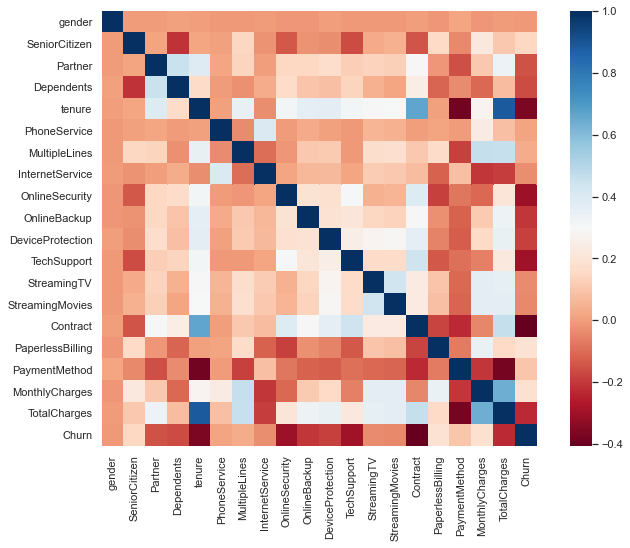

In [30]:
plt.subplots(figsize=(12, 8))
sns.heatmap(corr_spr_mat, vmax=1, cmap="RdBu", square=True);

**Observations:** Understandbly, Tenure has positive correlation with Total Charges and contract.
Partner and Dependant have a positive correlation -> Understandbly with partner more possibility of a dependant.
Senior citizen has negative correlations with contract (lower contract period - may be has less income), dependant, techsupport.
Strong negative correlation between payment method and tenure.

In [34]:
# Correlations with respect to churn
corr_spr_mat['Churn'].sort_values()

Contract           -0.406262
tenure             -0.367062
OnlineSecurity     -0.303918
TechSupport        -0.296815
TotalCharges       -0.229955
OnlineBackup       -0.203189
DeviceProtection   -0.185998
Dependents         -0.164221
Partner            -0.150448
StreamingMovies    -0.039147
StreamingTV        -0.037854
InternetService    -0.028690
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.037816
PaymentMethod       0.102270
SeniorCitizen       0.150889
MonthlyCharges      0.184743
PaperlessBilling    0.191825
Churn               1.000000
Name: Churn, dtype: float64

In [36]:
#Absolute values of correlation with respect to churn
abs(corr_spr_mat['Churn']).sort_values(ascending=False)

Churn               1.000000
Contract            0.406262
tenure              0.367062
OnlineSecurity      0.303918
TechSupport         0.296815
TotalCharges        0.229955
OnlineBackup        0.203189
PaperlessBilling    0.191825
DeviceProtection    0.185998
MonthlyCharges      0.184743
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.102270
StreamingMovies     0.039147
StreamingTV         0.037854
MultipleLines       0.037816
InternetService     0.028690
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64